In [2]:
import pandas as pd

In [2]:
main = pd.read_csv("malicious_phish.csv")
main

FileNotFoundError: [Errno 2] No such file or directory: 'malicious_phish.csv'

In [3]:
main=pd.DataFrame()

In [4]:
import pandas as pd

# Define a list of file paths and corresponding types
file_paths = [
    ("Benign_list_big_final.csv", "benign"),
    ("DefacementSitesURLFiltered.csv", "defacement"),
    ("Malware_dataset.csv", "malware"),
    ("phishing_dataset.csv", "phishing"),
    ("spam_dataset.csv", "spam")
]

# Initialize an empty list to store dataframes
dfs = []

# Iterate through the file paths and types
for file_path, url_type in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path, header=None)
    # Assign column names
    df.columns = ["url"]
    # Add a column for the URL type
    df["type"] = url_type
    # Append the dataframe to the list
    dfs.append(df)

dfs.append(main)
# Concatenate the list of dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.drop_duplicates(inplace=True)
merged_df.reset_index(drop=True, inplace=True)

# Display the merged dataframe
merged_df.head(100000)

,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
...,...,...
99995,http://www.ccent.com.au/index.php?view=article...,defacement
99996,http://www.ccent.com.au/index.php?option=com_c...,defacement
99997,http://www.ccent.com.au/index.php?option=com_m...,defacement
99998,http://www.ccent.com.au/index.php?view=article...,defacement


# Null

In [5]:
missing_values = merged_df.isnull().sum()
print(missing_values)

url     0
type    0
dtype: int64


In [6]:
merged_df = merged_df.dropna()

# Duplicates

In [7]:
duplicate_rows = merged_df[merged_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [url, type]
Index: []


# Balancing

In [8]:
type_counts = merged_df['type'].value_counts()

# Calculate the percentage for each category
type_percentages = (type_counts / type_counts.sum()) * 100

# Combine the counts and percentages into a DataFrame
type_summary = pd.DataFrame({
    'count': type_counts,
    'percentage': type_percentages
})

print(type_summary)

            count  percentage
type                         
defacement  95308   61.388434
benign      35378   22.787175
spam        11921    7.678385
phishing     9956    6.412717
malware      2691    1.733289


In [9]:
# Get the count of the largest class
max_count = merged_df['type'].value_counts().max()

# Create a new balanced dataframe by resampling the minority classes
balanced_df = pd.DataFrame()

for type in merged_df['type'].unique():
    # Get the data for each type
    type_data = merged_df[merged_df['type'] == type]

    # Calculate how many times to replicate the data
    times_to_repeat = max_count // len(type_data)
    remaining = max_count % len(type_data)

    # Replicate the data
    balanced_type_data = pd.concat([type_data] * times_to_repeat, ignore_index=True)

    # If there's any leftover data to reach max_count, sample it
    if remaining > 0:
        balanced_type_data = pd.concat([balanced_type_data,
                                            type_data.sample(remaining, replace=True)],
                                           ignore_index=True)

    # Append the balanced type data
    balanced_df = pd.concat([balanced_df, balanced_type_data], ignore_index=True)

In [10]:
type_counts = balanced_df['type'].value_counts()

# Calculate the percentage for each category
type_percentages = (type_counts / type_counts.sum()) * 100

# Combine the counts and percentages into a DataFrame
type_summary = pd.DataFrame({
    'count': type_counts,
    'percentage': type_percentages
})

print(type_summary)

            count  percentage
type                         
benign      95308        20.0
defacement  95308        20.0
malware     95308        20.0
phishing    95308        20.0
spam        95308        20.0


# Downlaod DF

In [11]:
balanced_df.to_csv('balanced_df.csv', index=False)

# ML Model

## Categorial Encoding

In [12]:
oneHot_df = pd.get_dummies(merged_df, columns=['type'], drop_first=False)

In [13]:
oneHot_df

,url,type_benign,type_defacement,type_malware,type_phishing,type_spam
0,http://1337x.to/torrent/1048648/American-Snipe...,True,False,False,False,False
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,True,False,False,False,False
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,True,False,False,False,False
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,True,False,False,False,False
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,True,False,False,False,False
...,...,...,...,...,...,...
155249,http://archive.salisburyjournal.co.uk/2001/3/7/,False,False,False,False,True
155250,http://astore.amazon.co.uk/allezvinsfrenchr/de...,False,False,False,False,True
155251,http://archive.thisischeshire.co.uk/2000/1/14/...,False,False,False,False,True
155252,http://applerugs.co.uk/rugs/product_info.php?p...,False,False,False,False,True


In [14]:
pip install tldextract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 4.4 MB/s eta 0:00:00


In [15]:
import pandas as pd
import tldextract
import urllib.parse
import re
import numpy as np
from collections import Counter
from math import log2

def compute_features(df):
    def get_entropy(string):
        """Computes Shannon entropy of a string"""
        if not string:
            return 0
        prob = [n / len(string) for n in Counter(string).values()]
        return -sum(p * log2(p) for p in prob)

    def count_digits(s):
        return sum(c.isdigit() for c in s)

    def count_letters(s):
        return sum(c.isalpha() for c in s)

    def count_special_chars(s):
        return len(re.findall(r'[^a-zA-Z0-9]', s))

    feature_list = []

    for url in df['url']:
        parsed = urllib.parse.urlparse(url)
        domain_info = tldextract.extract(url)

        domain = domain_info.domain
        subdomain = domain_info.subdomain
        suffix = domain_info.suffix
        path = parsed.path
        query = parsed.query
        filename = path.split("/")[-1] if "." in path.split("/")[-1] else ""

        feature_dict = {
            'urlLen': len(url),
            'domainlength': len(domain),
            'pathLength': len(path),
            'subDirLen': len(parsed.path.split('/')) - 1,
            'fileNameLen': len(filename),
            'ArgLen': len(query),
            'domain_token_count': len(domain.split('-')),
            'path_token_count': len(path.split('/')),
            'NumberofDotsinURL': url.count('.'),
            'isIP': bool(re.match(r'^(\d{1,3}\.){3}\d{1,3}$', domain)),
            'URL_DigitCount': count_digits(url),
            'host_DigitCount': count_digits(domain),
            'Directory_DigitCount': count_digits(path),
            'File_name_DigitCount': count_digits(filename),
            'Query_DigitCount': count_digits(query),
            'URL_LetterCount': count_letters(url),
            'host_letter_count': count_letters(domain),
            'Directory_LetterCount': count_letters(path),
            'Filename_LetterCount': count_letters(filename),
            'Query_LetterCount': count_letters(query),
            'SymbolCount_URL': count_special_chars(url),
            'SymbolCount_Domain': count_special_chars(domain),
            'SymbolCount_Path': count_special_chars(path),
            'Entropy_URL': get_entropy(url),
            'Entropy_Domain': get_entropy(domain),
            'Entropy_Path': get_entropy(path),
        }
        feature_list.append(feature_dict)

    feature_df = pd.DataFrame(feature_list)
    return pd.concat([df, feature_df], axis=1)


# Compute features
df_with_features = compute_features(oneHot_df)

# Save to CSV
df_with_features.to_csv("feature extracted.csv", index=False)



In [16]:
df_with_features

,url,type_benign,type_defacement,type_malware,type_phishing,type_spam,urlLen,domainlength,pathLength,subDirLen,...,host_letter_count,Directory_LetterCount,Filename_LetterCount,Query_LetterCount,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Path,Entropy_URL,Entropy_Domain,Entropy_Path
0,http://1337x.to/torrent/1048648/American-Snipe...,True,False,False,False,False,83,5,68,4,...,1,42,0,0,16,0,12,4.876201,1.921928,4.638502
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,True,False,False,False,False,83,5,68,4,...,1,36,0,0,17,0,13,4.920700,1.921928,4.788878
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,True,False,False,False,False,83,5,68,4,...,1,37,0,0,17,0,13,4.821630,1.921928,4.671231
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,True,False,False,False,False,83,5,68,4,...,1,39,0,0,19,0,15,4.889040,1.921928,4.748150
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,True,False,False,False,False,83,5,68,4,...,1,41,0,0,17,0,13,4.772234,1.921928,4.559325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155249,http://archive.salisburyjournal.co.uk/2001/3/7/,False,False,False,False,True,47,16,10,4,...,16,0,0,0,10,0,4,4.479497,3.375000,2.321928
155250,http://astore.amazon.co.uk/allezvinsfrenchr/de...,False,False,False,False,True,81,6,55,4,...,6,26,0,0,12,0,6,4.874809,2.251629,4.558010
155251,http://archive.thisischeshire.co.uk/2000/1/14/...,False,False,False,False,True,57,14,22,4,...,14,4,4,0,11,0,5,4.225017,2.645593,3.170135
155252,http://applerugs.co.uk/rugs/product_info.php?p...,False,False,False,False,True,116,9,22,2,...,9,18,14,38,18,0,4,4.978641,2.947703,3.879664


In [17]:
import torch

torch.cuda.is_available()

True

In [21]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [27]:
pip install --upgrade --force-reinstall numpy gensim


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt

In [1]:
import pandas as pd
import numpy as np
import re
from gensim.models import Word2Vec

# Load extracted features dataset
df = pd.read_csv("feature extracted.csv")

# Tokenize URLs
def tokenize_url(url):
    """Tokenizes a URL by splitting on common delimiters."""
    return re.split(r'[./?&=-]+', url)

# Apply tokenization to all URLs
df["tokenized_url"] = df["url"].astype(str).apply(tokenize_url)

# Train Word2Vec model
sentences = df["tokenized_url"].tolist()  # List of tokenized URLs
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

# Function to convert a URL into a Word2Vec embedding
def url_to_embedding(tokens):
    vectors = [word2vec_model.wv[token] for token in tokens if token in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)  # Handle missing words

# Convert all URLs to embeddings
df["word2vec_embedding"] = df["tokenized_url"].apply(url_to_embedding)

# Expand embeddings into separate columns
embedding_cols = [f"word2vec_{i}" for i in range(100)]
df_embedding = pd.DataFrame(df["word2vec_embedding"].to_list(), columns=embedding_cols)

# Merge with original dataset and drop unneeded columns
df_final = pd.concat([df.drop(columns=["tokenized_url", "word2vec_embedding"]), df_embedding], axis=1)

# Save final dataset
df_final.to_csv("feature_extracted_with_word2vec.csv", index=False)

# Display first few rows
df_final.head()


,url,type_benign,type_defacement,type_malware,type_phishing,type_spam,urlLen,domainlength,pathLength,subDirLen,...,word2vec_90,word2vec_91,word2vec_92,word2vec_93,word2vec_94,word2vec_95,word2vec_96,word2vec_97,word2vec_98,word2vec_99
0,http://1337x.to/torrent/1048648/American-Snipe...,True,False,False,False,False,83,5,68,4,...,0.006008,-0.061557,-0.071582,-0.173994,0.268313,-0.228618,0.161063,0.064831,0.040636,-0.346150
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,True,False,False,False,False,83,5,68,4,...,-0.019457,-0.032199,0.002411,-0.185874,0.265443,-0.140822,0.241032,0.215304,0.056219,-0.459683
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,True,False,False,False,False,83,5,68,4,...,-0.023461,0.106195,0.044930,-0.180496,0.300941,-0.336764,0.278594,0.304927,0.191706,-0.605228
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,True,False,False,False,False,83,5,68,4,...,-0.011641,-0.108052,-0.023445,-0.126129,0.284971,-0.285886,0.220443,0.075739,0.093093,-0.427634
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,True,False,False,False,False,83,5,68,4,...,-0.033717,0.017416,-0.013086,-0.177054,0.398980,-0.364093,0.323098,0.230571,-0.011933,-0.627177


In [65]:
# Load dataset
df = pd.read_csv("feature_extracted_with_word2vec.csv")

# Define feature columns (excluding 'url' and labels)
feature_cols = [col for col in df.columns if col not in ['url', 'type_benign', 'type_defacement', 'type_malware', 'type_phishing', 'type_spam']]
X = df[feature_cols].values
y = df[['type_benign', 'type_defacement', 'type_malware', 'type_phishing', 'type_spam']].values
print("X:")
print(X)


X:
[[83 5 68 ... 0.06483057 0.04063607 -0.34614995]
 [83 5 68 ... 0.2153039 0.05621862 -0.45968282]
 [83 5 68 ... 0.30492747 0.19170576 -0.6052276]
 ...
 [57 14 22 ... 0.61853546 0.49856728 -0.32562307]
 [116 9 22 ... 0.7812304 0.55684453 -0.6705264]
 [227 16 33 ... 0.28125528 0.5441967 -0.27746284]]


In [66]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Adding sequence dimension
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset



# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, output_size=5):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])
        return self.sigmoid(out)

# Model initialization
input_size = X_train.shape[1]
model = LSTMClassifier(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [69]:
# Training loop with accuracy and batch-wise loss calculation
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        batch_interval = max(1, len(train_loader) // 3)

        for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Calculate accuracy
            predictions = (outputs > 0.5).float()  # Threshold at 0.5
            correct += (predictions == y_batch).sum().item()
            total += y_batch.numel()  # Total number of labels

            # Print batch loss every 1/3 of total batches
            if (batch_idx + 1) % batch_interval == 0:
                print(f"Epoch {epoch+1}, Batch {batch_idx+1}/{len(train_loader)}, Loss: {loss.item():.4f}")

        # Compute average loss and accuracy per epoch
        accuracy = correct / total
        print(f"Epoch {epoch+1} Summary -> Avg Loss: {total_loss/len(train_loader):.4f}, Accuracy: {accuracy:.4f}\n")

# Train the model
train_model(model, train_loader, criterion, optimizer)


Epoch 1, Batch 1294/3882, Loss: 0.0396
Epoch 1, Batch 2588/3882, Loss: 0.0428
Epoch 1, Batch 3882/3882, Loss: 0.0012
Epoch 1 Summary -> Avg Loss: 0.0369, Accuracy: 0.9898

Epoch 2, Batch 1294/3882, Loss: 0.0287
Epoch 2, Batch 2588/3882, Loss: 0.0034
Epoch 2, Batch 3882/3882, Loss: 0.0001
Epoch 2 Summary -> Avg Loss: 0.0088, Accuracy: 0.9973

Epoch 3, Batch 1294/3882, Loss: 0.0013
Epoch 3, Batch 2588/3882, Loss: 0.0149
Epoch 3, Batch 3882/3882, Loss: 0.0001
Epoch 3 Summary -> Avg Loss: 0.0062, Accuracy: 0.9980

Epoch 4, Batch 1294/3882, Loss: 0.0006
Epoch 4, Batch 2588/3882, Loss: 0.0056
Epoch 4, Batch 3882/3882, Loss: 0.0005
Epoch 4 Summary -> Avg Loss: 0.0047, Accuracy: 0.9985

Epoch 5, Batch 1294/3882, Loss: 0.0003
Epoch 5, Batch 2588/3882, Loss: 0.0001
Epoch 5, Batch 3882/3882, Loss: 0.0000
Epoch 5 Summary -> Avg Loss: 0.0037, Accuracy: 0.9988



In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate model performance
def evaluate_model(model, test_loader):
    model.eval()
    y_pred, y_true = [], []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            y_pred.append(outputs.numpy())  # Convert to NumPy
            y_true.append(y_batch.numpy())

    y_pred = np.vstack(y_pred)
    y_true = np.vstack(y_true)

    # Convert probabilities to binary (0.5 threshold)
    y_pred_binary = (y_pred >= 0.5).astype(int)

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred_binary, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred_binary, average='weighted', zero_division=0)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return y_pred, y_true, accuracy, precision, recall, f1

# Evaluate the model
y_pred, y_true, accuracy, precision, recall, f1 = evaluate_model(model, test_loader)


Accuracy: 0.9948
Precision: 0.9912
Recall: 0.9935
F1 Score: 0.9923


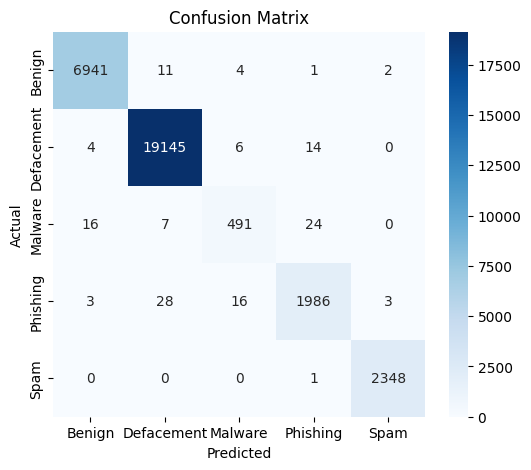

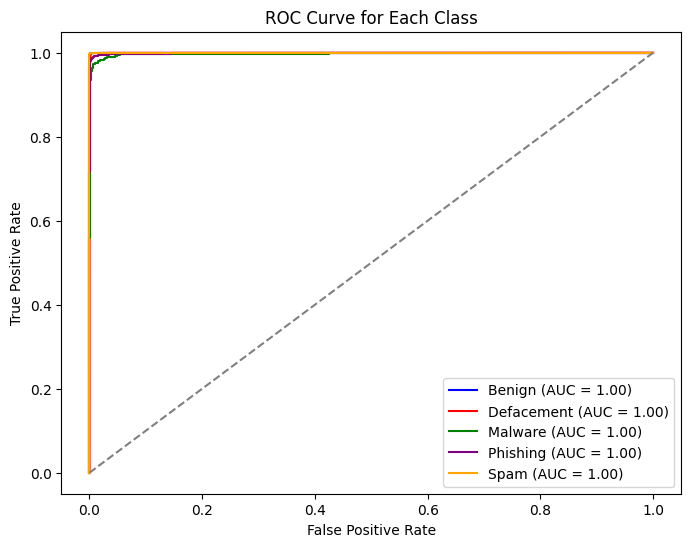

In [20]:

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    labels = ['Benign', 'Defacement', 'Malware', 'Phishing', 'Spam']
    cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_true, y_pred)

# ROC Curve for each class
def plot_roc_curve(y_true, y_pred):
    plt.figure(figsize=(8,6))
    colors = ['blue', 'red', 'green', 'purple', 'orange']
    labels = ['Benign', 'Defacement', 'Malware', 'Phishing', 'Spam']

    for i in range(5):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i], label=f"{labels[i]} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Each Class")
    plt.legend()
    plt.show()

plot_roc_curve(y_true, y_pred)


#Bert

In [33]:
from transformers import DistilBertTokenizer, DistilBertModel

In [37]:
from transformers import AutoTokenizer, AutoModel
# Load dataset
df = pd.read_csv("feature extracted.csv")

# Check if 'url' column exists
if "url" not in df.columns:
    raise ValueError("Dataset must contain a 'url' column for BERT input.")

# Load TinyBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("huawei-noah/TinyBERT_General_4L_312D")

# Tokenize URLs
df["tokenized"] = df["url"].apply(lambda x: tokenizer(x, padding="max_length", truncation=True, max_length=128, return_tensors="pt"))


config.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [45]:
class TinyBERTClassifier(nn.Module):
    def __init__(self):
        super(TinyBERTClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained("huawei-noah/TinyBERT_General_4L_312D")
        self.fc = nn.Linear(312, 5)  # TinyBERT hidden size = 312
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids):
        outputs = self.bert(input_ids)[1]  # Get pooled output
        return self.sigmoid(self.fc(outputs))

# Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TinyBERTClassifier().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

In [47]:
# Training Loop with Loss at Every 1/3 Batch
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        all_preds = []
        all_labels = []
        start_time = time.time()

        num_batches = len(train_loader)
        batch_1_3 = num_batches // 3
        batch_2_3 = 2 * num_batches // 3

        for batch_idx, (input_ids, y_batch) in enumerate(train_loader):
            input_ids, y_batch = input_ids.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(input_ids)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            # Convert predictions to binary format
            preds = (outputs.detach().cpu().numpy() > 0.5).astype(int)
            all_preds.extend(preds)
            all_labels.extend(y_batch.cpu().numpy())

            # Print loss at 1/3 and 2/3 batch completion
            if batch_idx == batch_1_3:
                print(f"📌 Epoch {epoch+1}: 1/3 completed | Loss: {total_loss/(batch_idx+1):.4f}")
            elif batch_idx == batch_2_3:
                print(f"📌 Epoch {epoch+1}: 2/3 completed | Loss: {total_loss/(batch_idx+1):.4f}")

        # Calculate accuracy
        acc = accuracy_score(all_labels, all_preds)

        # Print epoch summary
        end_time = time.time()
        print(f"✅ Epoch {epoch+1}, Final Loss: {total_loss/num_batches:.4f}, Accuracy: {acc:.4f}, Time: {end_time - start_time:.2f}s")

# Train Model
train_model(model, train_loader, criterion, optimizer)

📌 Epoch 1: 1/3 completed | Loss: 0.0774
📌 Epoch 1: 2/3 completed | Loss: 0.0541
✅ Epoch 1, Final Loss: 0.0421, Accuracy: 0.9643, Time: 298.81s
📌 Epoch 2: 1/3 completed | Loss: 0.0115
📌 Epoch 2: 2/3 completed | Loss: 0.0104
✅ Epoch 2, Final Loss: 0.0095, Accuracy: 0.9922, Time: 299.13s
📌 Epoch 3: 1/3 completed | Loss: 0.0057
📌 Epoch 3: 2/3 completed | Loss: 0.0056
✅ Epoch 3, Final Loss: 0.0053, Accuracy: 0.9958, Time: 298.43s
📌 Epoch 4: 1/3 completed | Loss: 0.0037
📌 Epoch 4: 2/3 completed | Loss: 0.0036
✅ Epoch 4, Final Loss: 0.0035, Accuracy: 0.9972, Time: 298.99s
📌 Epoch 5: 1/3 completed | Loss: 0.0026
📌 Epoch 5: 2/3 completed | Loss: 0.0026
✅ Epoch 5, Final Loss: 0.0026, Accuracy: 0.9981, Time: 300.56s


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate model performance
def evaluate_model(model, test_loader):
    model.eval()
    device = next(model.parameters()).device
    y_pred, y_true = [], []

    with torch.no_grad():
        for batch in test_loader:
            if isinstance(batch, list):
                X_batch, y_batch = batch  # Unpack the list properly
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
            else:
                raise ValueError(f"Unexpected batch format: {type(batch)}")

            # Forward pass
            outputs = model(X_batch)
            y_pred.append(outputs.cpu().numpy())
            y_true.append(y_batch.cpu().numpy())

    y_pred = np.vstack(y_pred)
    y_true = np.vstack(y_true)

    # Convert logits to binary labels
    y_pred_binary = (y_pred >= 0).astype(int)

    # Convert one-hot encoded labels to class indices
    y_true_labels = y_true.argmax(axis=1)
    y_pred_labels = y_pred_binary.argmax(axis=1)

    # Compute metrics
    accuracy = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return y_pred, y_true, accuracy, precision, recall, f1

# Evaluate the model
y_pred, y_true, accuracy, precision, recall, f1 = evaluate_model(model, test_loader)


Accuracy: 0.9973
Precision: 0.9958
Recall: 0.9969
F1 Score: 0.9963


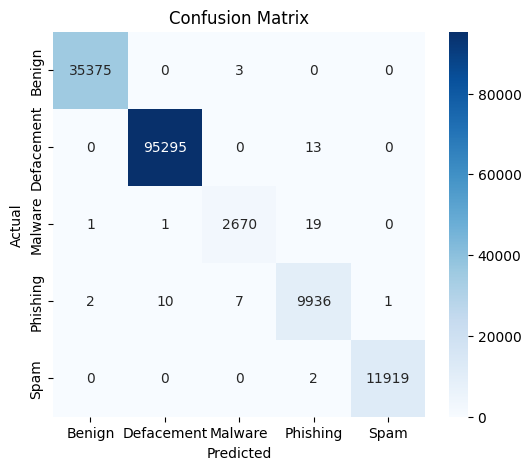

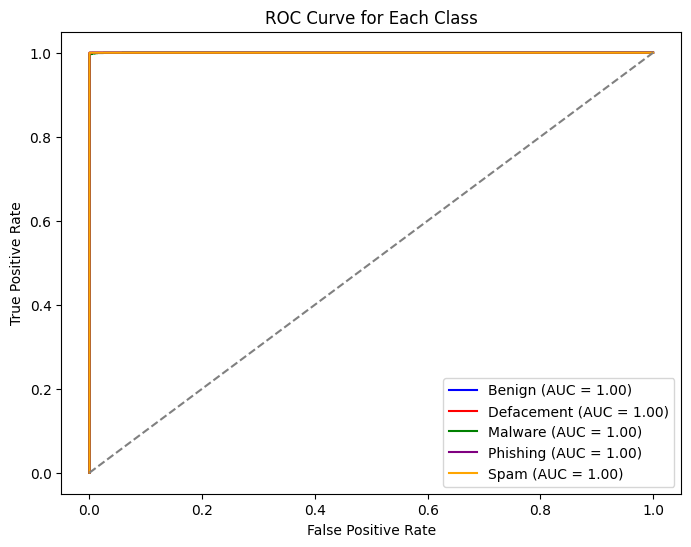

In [60]:

def plot_confusion_matrix(y_true, y_pred):
    labels = ['Benign', 'Defacement', 'Malware', 'Phishing', 'Spam']
    cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_true, y_pred)

# --------------------- ROC CURVE ---------------------
def plot_roc_curve(y_true, y_pred):
    plt.figure(figsize=(8,6))
    colors = ['blue', 'red', 'green', 'purple', 'orange']
    labels = ['Benign', 'Defacement', 'Malware', 'Phishing', 'Spam']

    for i in range(y_true.shape[1]):  # Loop through each class
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i], label=f"{labels[i]} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Each Class")
    plt.legend()
    plt.show()

plot_roc_curve(y_true, y_pred)